# Kolmogorov-Smirnov Test

The Kolmogorov-Smirnov (KS) test is a statistical method used to assess whether a sample of data follows a particular distribution or if two samples come from the same distribution. It's a non-parametric test, which means it makes minimal assumptions about the underlying distribution of the data.

In essence, the KS test helps you determine if there is a significant difference between the distribution of your sample data and the distribution you're comparing it to. If the calculated test statistic is small and the p-value associated with it is large (usually above a chosen significance level), you have evidence to suggest that your sample follows the expected distribution. Conversely, a large test statistic and a small p-value would indicate a significant difference between the two distributions.

The null hypothesis and the alternative hypothesis are fundamental concepts that help you draw conclusions about the data:

* Null Hypothesis (H0):
The null hypothesis, often denoted as H0, is a statement that there is no significant difference between the distribution of the sample data and the expected distribution (the theoretical distribution you're comparing to). In other words, it assumes that any observed differences between the two distributions are due to random chance or sampling variability. In terms of the KS test, the null hypothesis can be stated as: "The sample data follows the expected distribution."

* Alternative Hypothesis (H1 or Ha):
The alternative hypothesis, often denoted as H1 or Ha, contradicts the null hypothesis. It suggests that there is a significant difference between the distribution of the sample data and the expected distribution. It's essentially the hypothesis you're testing for evidence to support. In terms of the KS test, the alternative hypothesis can be stated as: "The sample data does not follow the expected distribution."

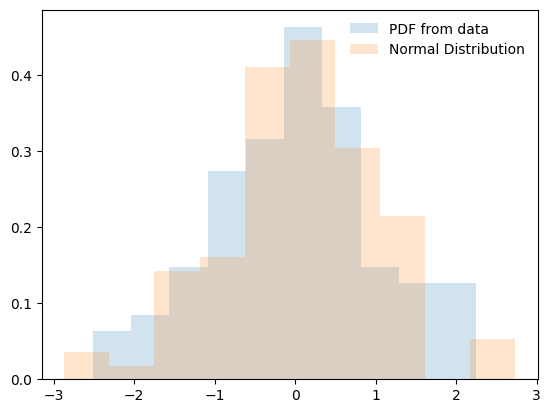

KstestResult(statistic=0.06666892712696482, pvalue=0.7401409340261476, statistic_location=-0.3142411987142564, statistic_sign=-1)

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm

def calc_pdf(data, bins=10):
    # getting data of the histogram
    count, bins_count = np.histogram(data, bins=bins)
    pdf = count / sum(count)
    return pdf, bins_count

def calc_cdf(data, bins=10):
    pdf, bins_count = calc_pdf(data, bins)
    cdf = np.cumsum(pdf)
    return bins_count[1:], cdf

# Two random variables
r = stats.norm.rvs(loc=0, scale=1, size=100)
r2 = stats.norm.rvs(loc=0, scale=1, size=100)

# r = np.linspace(0,10)
fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, label="PDF from data")
ax.hist(r2, density=True, histtype='stepfilled', alpha=0.2, label="Normal Distribution")
ax.legend(loc='best', frameon=False)
plt.show()

stats.kstest(r, 'norm')

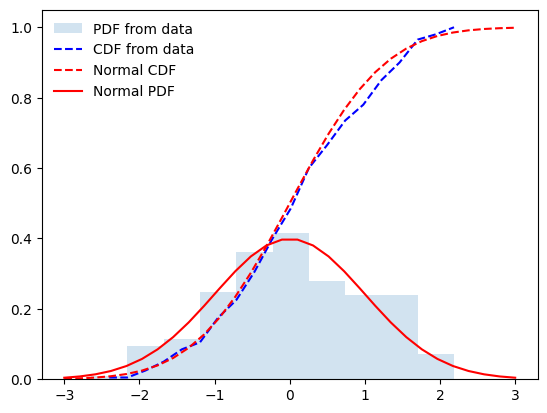

KstestResult(statistic=0.05820348495778216, pvalue=0.4889575294531765, statistic_location=0.9871011989377497, statistic_sign=-1)

In [4]:
###########################################
# KS One-Sample test

r = stats.norm.rvs(loc=0, scale=1, size=200)
bc, cdf = calc_cdf(r, 20)

xs = np.linspace(-3, 3, 30)

fig, ax = plt.subplots(1, 1)
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2, label="PDF from data")
ax.plot(bc, cdf, 'b--', label="CDF from data")
ax.plot(xs, stats.norm.cdf(xs, 0, 1), 'r--', label="Normal CDF")
ax.plot(xs, stats.norm.pdf(xs, 0, 1), label="Normal PDF", color="red")
ax.legend(loc='best', frameon=False)
plt.show()

stats.kstest(r, 'norm')

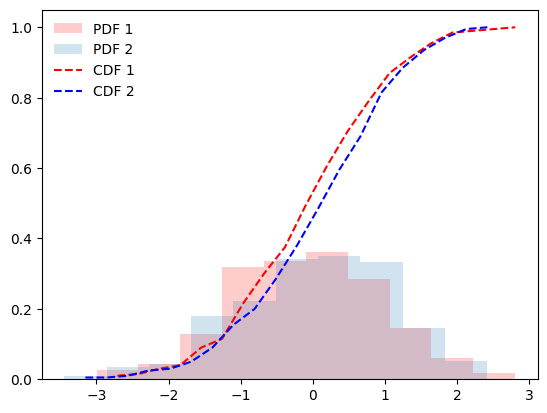

KstestResult(statistic=0.105, pvalue=0.220541217580421, statistic_location=0.6445716692594935, statistic_sign=1)

In [3]:
###########################################
# KS Two-Sample test 

r = stats.norm.rvs(loc=0, scale=1, size=200)
bc, cdf = calc_cdf(r, 20)
r2 = stats.norm.rvs(loc=0, scale=1, size=200)
bc2, cdf2 = calc_cdf(r2, 20)

fig, ax = plt.subplots(1, 1)
ax.hist(r, color='r', density=True, histtype='stepfilled', alpha=0.2, label="PDF 1")
ax.hist(r2, density=True, histtype='stepfilled', alpha=0.2, label="PDF 2")

ax.plot(bc, cdf, 'r--', label="CDF 1")
ax.plot(bc2, cdf2, 'b--', label="CDF 2")
ax.legend(loc='best', frameon=False)
plt.show()

###################################

stats.ks_2samp(r, r2)

# Kullback-Leibler and Jensen-Shannon Divergences

KL Divergence:  124.03505159958345
JS Divergence:  14.357636913592302


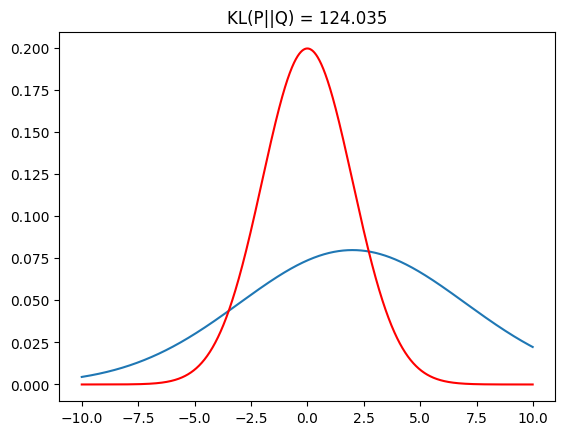

In [4]:
import numpy as np

def kl_divergence(p, q):
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

# calculate the js divergence
def js_divergence(p, q):
    m = 0.5 * (p + q)
    return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

r = stats.norm.rvs(loc=2, scale=20, size=100)
r2 = stats.norm.rvs(loc=0, scale=2, size=100)

x = np.arange(-10, 10, 0.01)
p = norm.pdf(x, 2, 5)
q = norm.pdf(x, 0, 2)

print('KL Divergence: ' , kl_divergence(p, q))
print('JS Divergence: ' , js_divergence(p, q))

plt.title('KL(P||Q) = %1.3f' % kl_divergence(p, q))
plt.plot(x, p)
plt.plot(x, q, c='red')


# Chi-square Test

The Chi-Square (χ²) test for independence is a statistical method used to determine if there is a significant association between two categorical variables. It helps to assess whether the distribution of one variable is dependent on the distribution of another variable. In other words, it examines if there is a relationship between the two variables beyond what would be expected by chance.

Here's an explanation of the Chi-Square test for independence:

### Setup:

* You have two categorical variables. For example, consider a survey where one variable is "Gender" (with categories: Male, Female) and the other variable is "Preference for Product" (with categories: Yes, No).
* You want to investigate whether there's a relationship between gender and preference for the product.
### Hypotheses:

* Null Hypothesis (H0): There is no association between the two variables. In other words, the distribution of one variable is independent of the other.
* Alternative Hypothesis (Ha): There is an association between the two variables. The distribution of one variable is dependent on the other.
### Expected Frequencies:

* The Chi-Square test compares the observed frequencies of combinations of categories with the expected frequencies that would be observed if the two variables were independent.
* The expected frequencies are calculated assuming independence and are based on the marginal totals (the totals for each category in each variable).
### Calculating the Test Statistic:

* The Chi-Square test statistic measures the difference between the observed and expected frequencies in each cell of a contingency table (a table that displays the counts of the combinations of the two variables' categories).
* The formula for calculating the test statistic involves summing up the squared differences between observed and expected frequencies, divided by the expected frequency.
### Degrees of Freedom and Critical Value:

* The degrees of freedom for the Chi-Square test for independence depend on the dimensions of the contingency table (number of rows minus 1 times number of columns minus 1).
* With the test statistic and degrees of freedom, you can find the critical value from the Chi-Square distribution table or a statistical calculator. This critical value helps you determine whether the test statistic is statistically significant.
### Interpreting Results:

* Compare the calculated Chi-Square test statistic with the critical value.
* If the calculated test statistic is larger than the critical value, you reject the null hypothesis and conclude that there is a significant association between the variables.
* If the test statistic is not larger than the critical value, you do not have enough evidence to reject the null hypothesis, suggesting that there isn't a significant association between the variables.


In [11]:
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
from sklearn import preprocessing
import numpy as np

significance = 0.05

arr1 = np.array([23, 16, 14, 19, 28])
# arr2 = np.array([20, 20, 20, 20, 20])
# arr2 = np.array([20, 15, 20, 20, 15])
arr2 = np.array([40, 20, 20, 10, 5])

# arr2 = arr2 / np.sum(arr2)
# arr1 = arr1 / np.sum(arr1)

# # ######################################################
# # Goodness for fit
# # H0: Sample are drawn from the sample distribution
# print("Chi-square goodness for fit")
# # print(chisquare(arr1, f_exp=arr2))
# print(chisquare(arr1))

######################################################
# Test for Independence
# Null hypothesis (H0): Variable 1 and variable 2 are not related in the population; The proportions of variable 1 are the same for different values of variable 2.
# Alternative hypothesis (Ha): Variable 1 and  variable 2 are related in the population; The proportions of variable 1 are not the same for different values of  variable 2.
obs = np.array([arr1, arr2])
chi2, p, dof, ex = chi2_contingency(obs, correction=True)
print("Chi-square Independence:")
print("Chi-square statitic: ", chi2)
print("p-value: " , p)
print("DOF: " , dof)
print("Expected values:" , ex)

# print(stats.chisquare(obs.ravel(), f_exp=ex.ravel(),
#                              ddof=obs.size - 1 - dof))

# if p <= significance:
# 	print('reject Ho - They come from a different distribution')
# else:
# 	print('accept Ho - They come from same distribution')


Chi-square Independence:
Chi-square statitic:  24.802077339762825
p-value:  5.5136068609515254e-05
DOF:  4
Expected values: [[32.30769231 18.46153846 17.43589744 14.87179487 16.92307692]
 [30.69230769 17.53846154 16.56410256 14.12820513 16.07692308]]


In [7]:
# chi-squared test with similar proportions
from scipy.stats import chi2_contingency
from scipy.stats import chi2

# contingency table
# data = [[16, 18, 16, 14, 12, 12],
# 		[6, 6, 16, 12, 15, 10]]
# data = [[100, 200, 300, 300, 500, 500], [7, 600, 500, 400, 300, 200]]
data = [[43, 6, 14, 19, 28], [20, 20, 20, 20, 20]]
print(data)
stat, p, dof, expected = chi2_contingency(data)
print(expected)
# interpret test-statistic
prob = 0.95
chi = chi2.ppf(prob, dof)
print(p)

significance = 1 - prob
if p <= significance:
	print('reject Ho - they are not independent - they are dependent')
else:
	print('accept Ho - They are independent')

[[43, 6, 14, 19, 28], [20, 20, 20, 20, 20]]
[[33.         13.61904762 17.80952381 20.42857143 25.14285714]
 [30.         12.38095238 16.19047619 18.57142857 22.85714286]]
0.0012807504584923166
reject Ho - they are not independent - they are dependent
